# GRIP INTERSHIP - Nov20

## <p style="font-family: Arial; font-size:1.4em;color:Blue;"> Gargi Singh </p>

# TASK-2 

## <p style="font-family: Arial; font-size:1.4em;color:Darkgreen;"><u>Prediction using Unsupervised ML</u></p>
## <p style="font-family: Arial; font-size:1.4em;color:Darkgreen;"><u> From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.</u></p>

# Importing the libraries

In [48]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#To perform K-means clustering

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


from sklearn.metrics import silhouette_score

# Reading and understanding the data

In [49]:
#reading the data
df=pd.read_csv("iris-sparkintern.csv",sep=",", encoding="ISO-8859-1", header=0)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
#reading the shape of the dataset
df.shape

(150, 6)

- we have 150 rows and 6 columns 

In [51]:
# checking the overall information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [52]:
#checking the dataset from statistical point of view
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### DATA CLEANING 

In [53]:
#checking the null values 
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- There is no null values . the dataset looks very clean we can proceed with the same dataset

# Data visualization

### Univariate Analysis

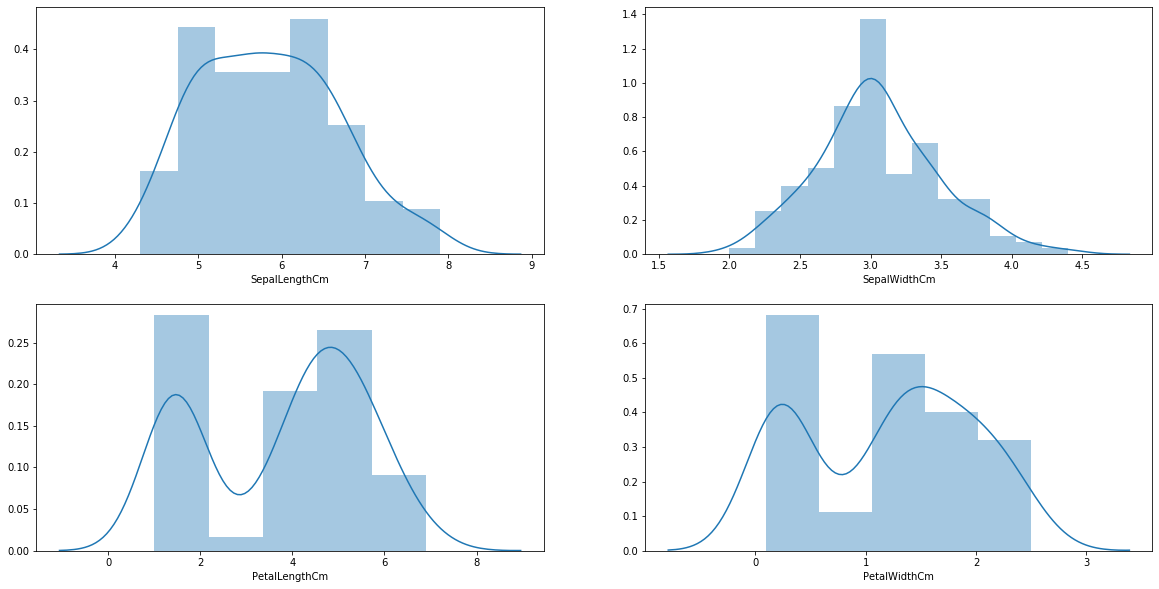

In [54]:
#checking the dataset and analysing it
fig,ax=plt.subplots(2,2,figsize=(20,10))
plt1=sns.distplot(df["SepalLengthCm"],ax=ax[0,0])
plt2=sns.distplot(df["SepalWidthCm"],ax=ax[0,1])
plt3=sns.distplot(df["PetalLengthCm"],ax=ax[1,0])
plt4=sns.distplot(df["PetalWidthCm"],ax=ax[1,1])


- Sepal Length and Sepal width has the data distribution looks normal so we might not be able to draw some references but the Petal length and Petal width has the variation in the data distribution hence it might be helping us in drawing some references 

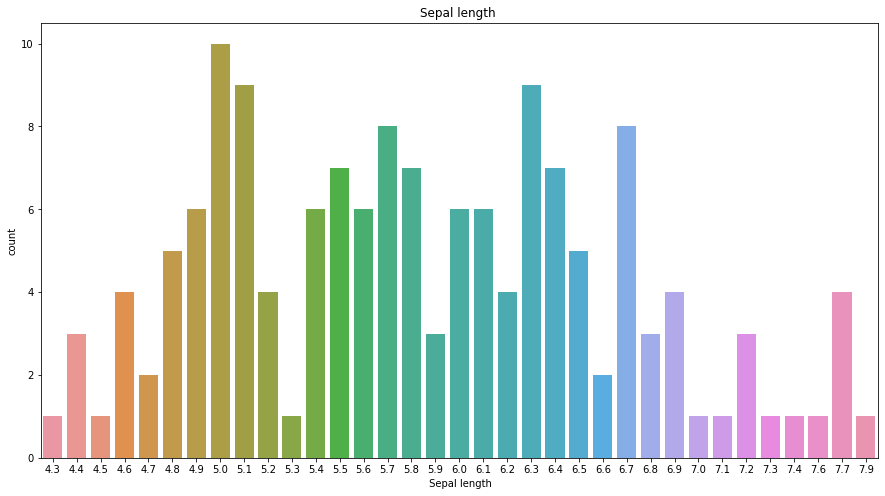

In [55]:
#closing checking the variables 
fig=plt.figure(figsize=(15,8))
sns.countplot(df["SepalLengthCm"])
plt.title("Sepal length ")
plt.xlabel(" Sepal length")
plt.show()

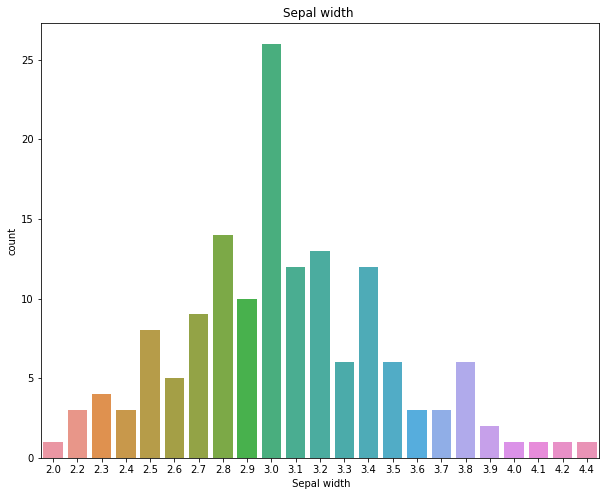

In [56]:
#closing checking the variables 
fig=plt.figure(figsize=(10,8))
sns.countplot(df["SepalWidthCm"])
plt.title("Sepal width ")
plt.xlabel(" Sepal width")
plt.show()

- We can notice that most of the flower Sepal width fall in the range  2.5 to 3.5

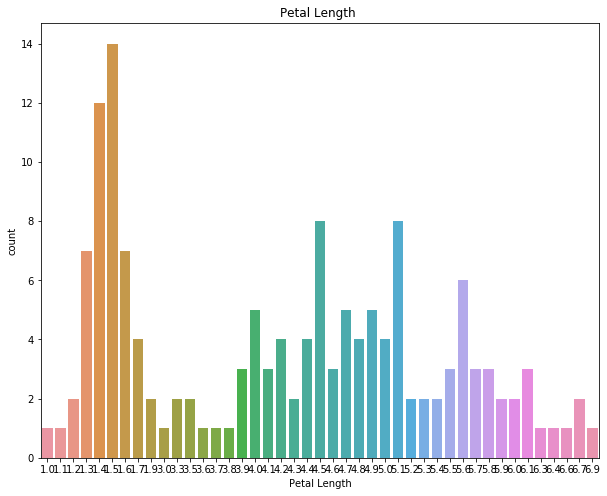

In [57]:
#closing checking the variables 
fig=plt.figure(figsize=(10,8))
sns.countplot(df["PetalLengthCm"])
plt.title("Petal Length ")
plt.xlabel("Petal Length")
plt.show()

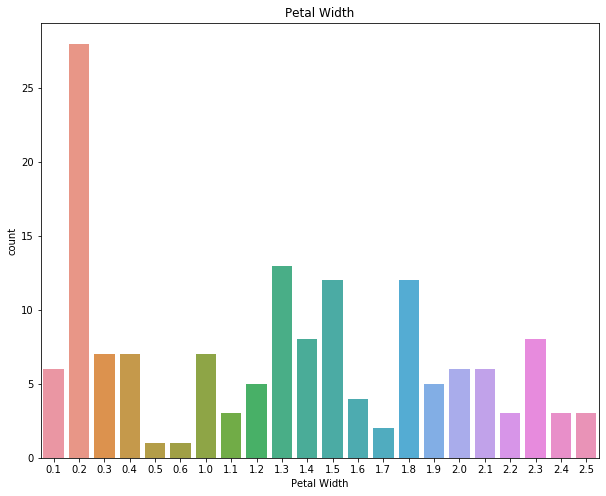

In [58]:
#closing checking the variables 
fig=plt.figure(figsize=(10,8))
sns.countplot(df["PetalWidthCm"])
plt.title("Petal Width")
plt.xlabel("Petal Width")
plt.show()

- many flower have the petal width as 0.2 

### Bivariate analysis

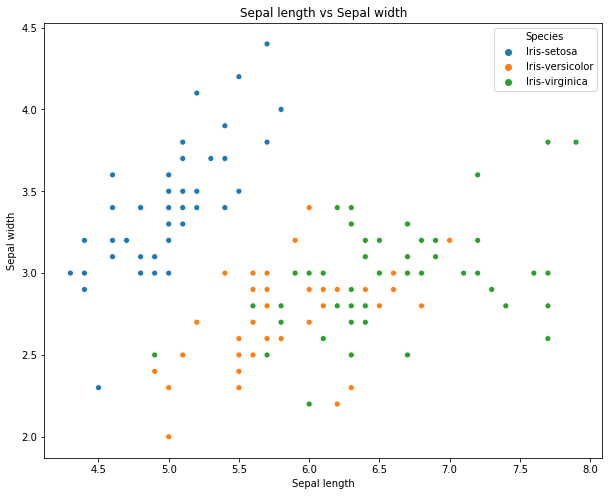

In [59]:
#checking the scatter plot of the features with the hue as species 
fig = plt.figure(figsize = (10,8))
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=df,hue="Species")
plt.xlabel('Sepal length')
plt.ylabel("Sepal width")
plt.title("Sepal length vs Sepal width")
plt.show()

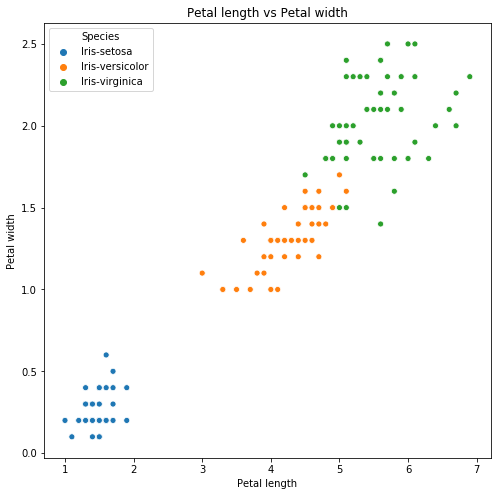

In [60]:
#checking the scatter plot of the features with the hue as species 
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",data=df,hue="Species")
plt.xlabel('Petal length')
plt.ylabel("Petal width")
plt.title("Petal length vs Petal width")
plt.show()

- We can notice we have the datset with good variance .It is definitlely going to give us good clusters 

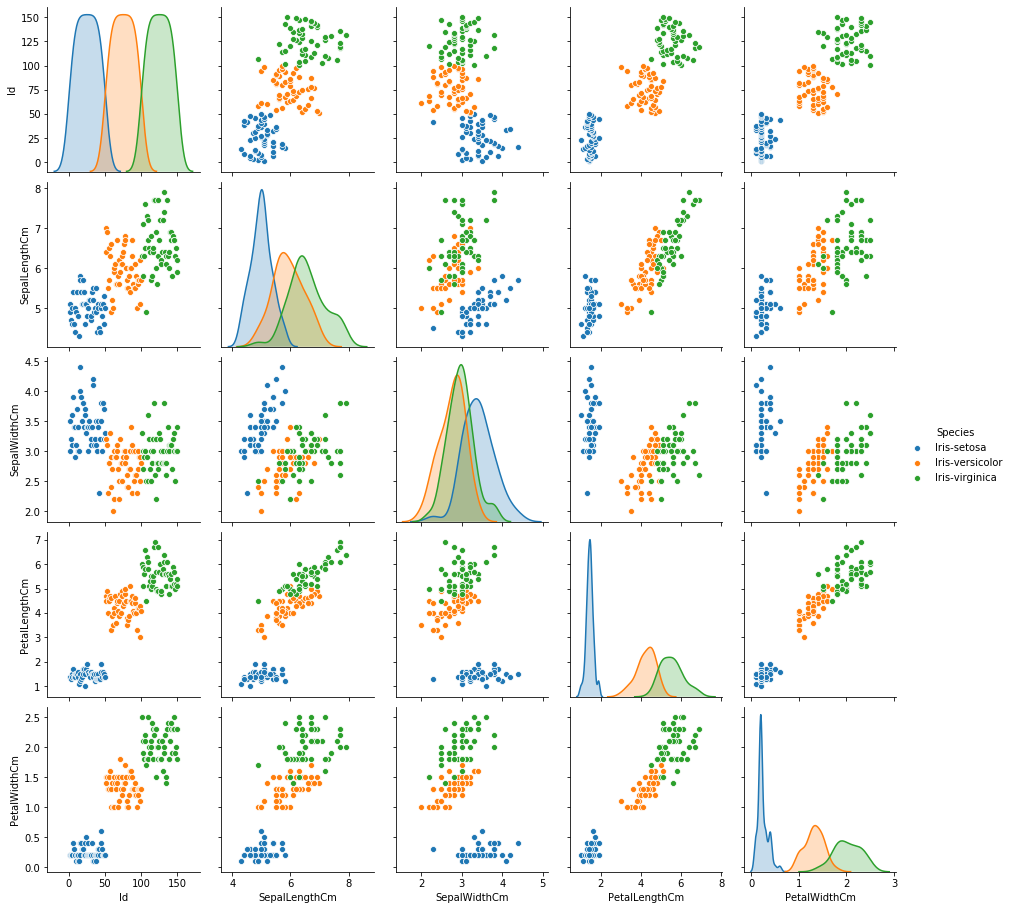

In [61]:
#checking thre pairplot of the dataset
sns.pairplot(df,hue="Species")
plt.show()

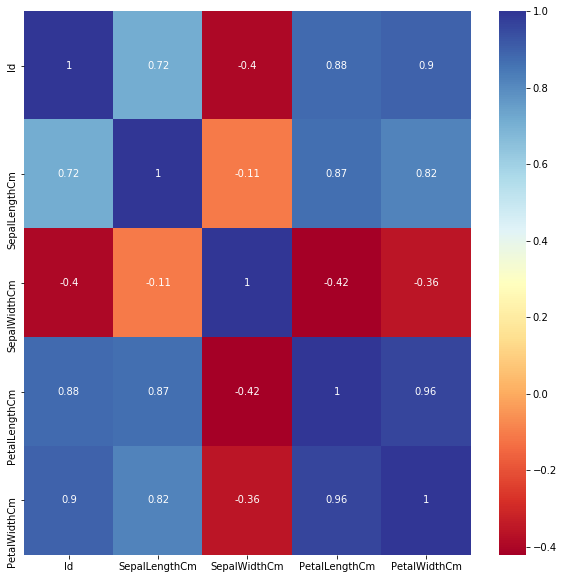

In [62]:
#checking the correaltion of the variables 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="RdYlBu")
plt.show()

- The variables are highly correlated 

### Outliers Treatment 

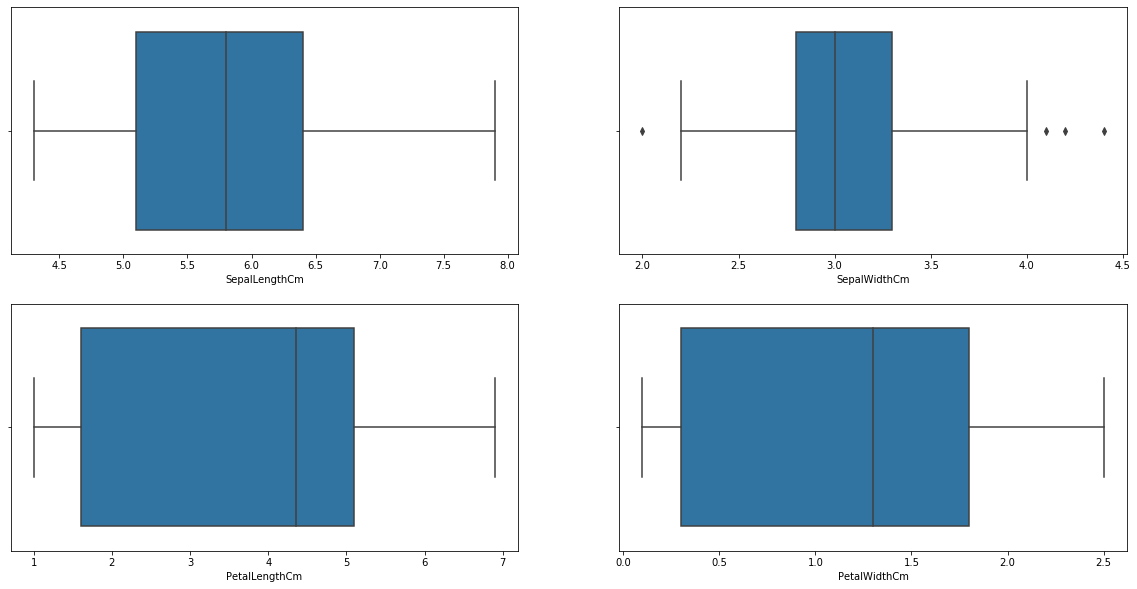

In [63]:
fig, axs = plt.subplots(2,2, figsize = (20,10))
plt1 = sns.boxplot(df['SepalLengthCm'], ax = axs[0,0])
plt2 = sns.boxplot(df['SepalWidthCm'], ax = axs[0,1])
plt3 = sns.boxplot(df['PetalLengthCm'], ax = axs[1,0])
plt1 = sns.boxplot(df['PetalWidthCm'], ax = axs[1,1])

- We see some outliers in the sepal Width we can cap them instead of dropping the outliers
- We can perform the soft range that is 1-99
- **But we have very less data we shall not touch the outliers and proceed ** 


## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [64]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [65]:
#checking the hopkins on my dataset after removing the Species feature
hopkins(df.drop("Species",axis=1))

0.7174316893779327

### Rescaling

In [66]:
#2. Rescaling
rfm_df=df[["SepalWidthCm","SepalLengthCm","PetalWidthCm","PetalLengthCm"]]

#instantiate
scaler=StandardScaler()

#fit_transform
rfm_scaled=scaler.fit_transform(rfm_df)
rfm_scaled.shape


(150, 4)

In [67]:
#since its scaled the result is the numpy array
rfm_scaled

array([[ 1.03205722e+00, -9.00681170e-01, -1.31297673e+00,
        -1.34127240e+00],
       [-1.24957601e-01, -1.14301691e+00, -1.31297673e+00,
        -1.34127240e+00],
       [ 3.37848329e-01, -1.38535265e+00, -1.31297673e+00,
        -1.39813811e+00],
       [ 1.06445364e-01, -1.50652052e+00, -1.31297673e+00,
        -1.28440670e+00],
       [ 1.26346019e+00, -1.02184904e+00, -1.31297673e+00,
        -1.34127240e+00],
       [ 1.95766909e+00, -5.37177559e-01, -1.05003079e+00,
        -1.17067529e+00],
       [ 8.00654259e-01, -1.50652052e+00, -1.18150376e+00,
        -1.34127240e+00],
       [ 8.00654259e-01, -1.02184904e+00, -1.31297673e+00,
        -1.28440670e+00],
       [-3.56360566e-01, -1.74885626e+00, -1.31297673e+00,
        -1.34127240e+00],
       [ 1.06445364e-01, -1.14301691e+00, -1.44444970e+00,
        -1.28440670e+00],
       [ 1.49486315e+00, -5.37177559e-01, -1.31297673e+00,
        -1.28440670e+00],
       [ 8.00654259e-01, -1.26418478e+00, -1.31297673e+00,
      

In [68]:
#converting to dataframe
rfm_scaled=pd.DataFrame(rfm_scaled)
rfm_scaled

,0,1,2,3
0,1.032057,-0.900681,-1.312977,-1.341272
1,-0.124958,-1.143017,-1.312977,-1.341272
2,0.337848,-1.385353,-1.312977,-1.398138
3,0.106445,-1.506521,-1.312977,-1.284407
4,1.263460,-1.021849,-1.312977,-1.341272
...,...,...,...,...
145,-0.124958,1.038005,1.447956,0.819624
146,-1.281972,0.553333,0.922064,0.705893
147,-0.124958,0.795669,1.053537,0.819624
148,0.800654,0.432165,1.447956,0.933356


In [69]:
#applying the feature name
rfm_scaled.columns=["SepalWidthCm","SepalLengthCm","PetalWidthCm","PetalLengthCm"]
rfm_scaled.head()

,SepalWidthCm,SepalLengthCm,PetalWidthCm,PetalLengthCm
0,1.032057,-0.900681,-1.312977,-1.341272
1,-0.124958,-1.143017,-1.312977,-1.341272
2,0.337848,-1.385353,-1.312977,-1.398138
3,0.106445,-1.506521,-1.312977,-1.284407
4,1.263460,-1.021849,-1.312977,-1.341272


# Finding the optimal number of clusters

In [70]:
#elbow-curve/ssd
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_scaled)
    
    ssd.append(kmeans.inertia_)
ssd 

[223.73200573676345,
 141.15417813388652,
 114.36281520484567,
 91.12699991626465,
 80.8137969399017,
 72.54899742311954,
 63.33628304292468]

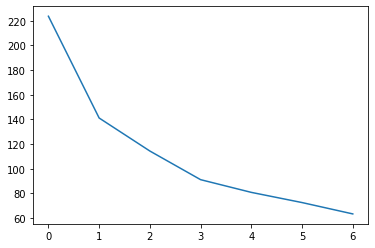

In [71]:
#plot the ssd
plt.plot(ssd)

**Inference** :

Looking at the above elbow curve it looks good to proceed with 3 clusters.
Lets check the other technique to find the optimal cluster

### Silhouette Analysis

#### Silhouette score=p-q/max(p,q)

p is the mean distance to the point in the nearest cluster that a data point is not a part of.

q is the mean intra-cluster distance to all the points in its own cluster.

**The value of the silhouette score range lies between -1 to 1.**
- A score closer to 1 indicates that the datapoint is very similar to other data points in the cluster
- A score closer to -1 indicates the datapoints is not similar to the data in its cluster.

In [72]:
#silhoette analysis
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    #initialising k means
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_scaled)
    
    
    cluster_labels=kmeans.labels_
    
    #silhouette score
    silhouette_avg=silhouette_score(rfm_scaled,cluster_labels)
    print("For n_clusters={0},the silhouetee score is {1}".format(num_clusters,silhouette_avg))

For n_clusters=2,the silhouetee score is 0.580184463257396
For n_clusters=3,the silhouetee score is 0.4589717867018717
For n_clusters=4,the silhouetee score is 0.38912159486904757
For n_clusters=5,the silhouetee score is 0.34805236242232845
For n_clusters=6,the silhouetee score is 0.3408911516034541
For n_clusters=7,the silhouetee score is 0.32869217573090237
For n_clusters=8,the silhouetee score is 0.343298692177904


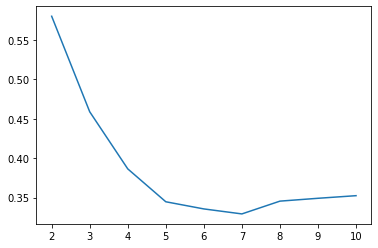

In [73]:
#plot the silhoutte score
ss=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=100).fit(rfm_scaled)
    ss.append([k,silhouette_score(rfm_scaled,kmeans.labels_)])
temp=pd.DataFrame(ss)
plt.plot(temp[0],temp[1])
plt.show()

- We will go ahead with the k=3 as shown int the elbow curve and also k=3 in the silhouette score confirms the good cluster 

In [74]:
#final model with k=3
kmeans=KMeans(n_clusters=3,max_iter=50,random_state=100)
kmeans.fit(rfm_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [75]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [76]:
#make the copy of the original data 
df_new=df.copy()

In [77]:
# Adding  the cluster labels in our  dataset

df_new['label']=kmeans.labels_
df_new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [78]:
# lets check the counts in each clusters 
df_new.label.value_counts()

2    53
1    50
0    47
Name: label, dtype: int64

#### Visualizing the clusters formed 

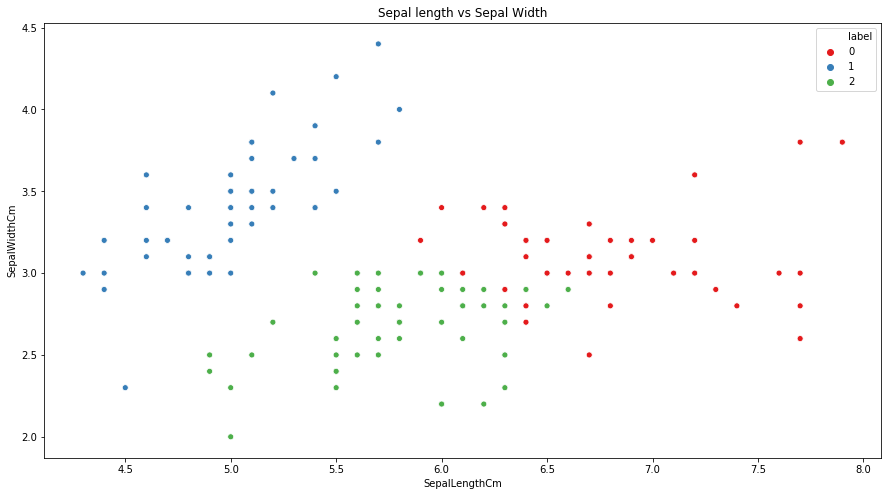

In [79]:
#lets plot the cluster plot to check the clusters formed
plt.figure(figsize=(15,8))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='label',data=df_new,palette='Set1')
plt.title("Sepal length vs Sepal Width")
plt.show()

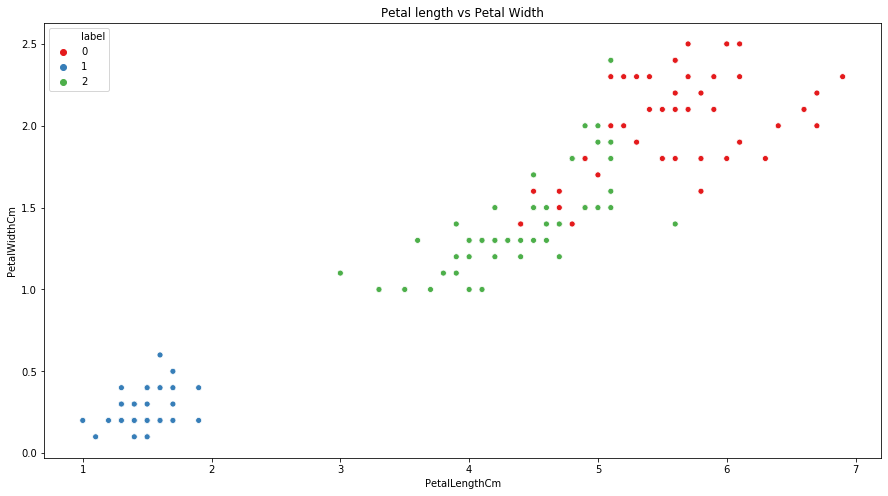

In [80]:
#lets plot the cluster plot to check the clusters formed
plt.figure(figsize=(15,8))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='label',data=df_new,palette='Set1')
plt.title("Petal length vs Petal Width")
plt.show()

In [81]:
# we will filter the dataset based on the clusters 
df_new[df_new["label"]==2]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
53,54,5.5,2.3,4.0,1.3,Iris-versicolor,2
54,55,6.5,2.8,4.6,1.5,Iris-versicolor,2
55,56,5.7,2.8,4.5,1.3,Iris-versicolor,2
57,58,4.9,2.4,3.3,1.0,Iris-versicolor,2
58,59,6.6,2.9,4.6,1.3,Iris-versicolor,2
59,60,5.2,2.7,3.9,1.4,Iris-versicolor,2
60,61,5.0,2.0,3.5,1.0,Iris-versicolor,2
61,62,5.9,3.0,4.2,1.5,Iris-versicolor,2
62,63,6.0,2.2,4.0,1.0,Iris-versicolor,2
63,64,6.1,2.9,4.7,1.4,Iris-versicolor,2


In [82]:
# we will filter the dataset based on the clusters 
df_new[df_new["label"]==0]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
50,51,7.0,3.2,4.7,1.4,Iris-versicolor,0
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,0
52,53,6.9,3.1,4.9,1.5,Iris-versicolor,0
56,57,6.3,3.3,4.7,1.6,Iris-versicolor,0
65,66,6.7,3.1,4.4,1.4,Iris-versicolor,0
70,71,5.9,3.2,4.8,1.8,Iris-versicolor,0
75,76,6.6,3.0,4.4,1.4,Iris-versicolor,0
76,77,6.8,2.8,4.8,1.4,Iris-versicolor,0
77,78,6.7,3.0,5.0,1.7,Iris-versicolor,0
85,86,6.0,3.4,4.5,1.6,Iris-versicolor,0


In [83]:
# we will filter the dataset based on the clusters 
df_new[df_new["label"]==1]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
5,6,5.4,3.9,1.7,0.4,Iris-setosa,1
6,7,4.6,3.4,1.4,0.3,Iris-setosa,1
7,8,5.0,3.4,1.5,0.2,Iris-setosa,1
8,9,4.4,2.9,1.4,0.2,Iris-setosa,1
9,10,4.9,3.1,1.5,0.1,Iris-setosa,1


### With the help of  K-mean clustering found the best 3 clusters from the dataset .
#### Used  two techiniques to get the optimal clusters 
- Elbow curve 
- Silhouette Analysis